In [ ]:
""""why Naive??
Because it extracts most of its features from teh traditional BAyes theorem, which also includes INDEPENDENCE (no correlation shoudl be there) assumption (which is sometimes not correct)
it does not have anything new of its own and hence Naive Bayes"""

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [3]:
dataset = pd.read_csv('E://Gaurav/ML_Dataset/Naive_Bayes/Social_Network_Ads.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
x = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values 

In [6]:
# dividing the data into training and test data:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)

In [7]:
# feature Scaling

from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler() 
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)  

# feature scaling important since we need to predict precisely

In [10]:
# Fiting the regression

from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(x_train,y_train) # model fitted to train set

GaussianNB(priors=None, var_smoothing=1e-09)

In [11]:
# Predicting the Test Result

y_pred = classifier.predict(x_test)

In [12]:
# creating a confusion matrix

from sklearn.metrics import confusion_matrix  # this is a function and not a class !!!(CLasses are written in CAPS)

cm = confusion_matrix(y_test,y_pred)

In [14]:
cm

array([[65,  3],
       [ 7, 25]], dtype=int64)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


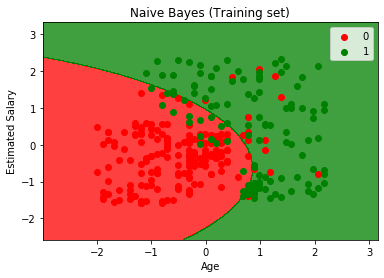

In [15]:
# Visualizing the Training set result

from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:

from matplotlib.colors import ListedColormap
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
""""A Smooth curve with smooth boundaries